## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile your model
"""
model = build_mlp()
model.summary()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


## try 500 epochs

In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.9708 - acc: 0.2893 - val_loss: 1.7961 - val_acc: 0.3621
Epoch 2/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.7350 - acc: 0.3795 - val_loss: 1.6433 - val_acc: 0.4172
Epoch 3/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6299 - acc: 0.4197 - val_loss: 1.6239 - val_acc: 0.4233
Epoch 4/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.5556 - acc: 0.4446 - val_loss: 1.5858 - val_acc: 0.4321
Epoch 5/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.5189 - acc: 0.4600 - val_loss: 1.5101 - val_acc: 0.4613
Epoch 6/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.4720 - acc: 0.4752 - val_loss: 1.4763 - val_acc: 0.4746
Epoch 7/500
50000/50000 [==============================] - 2s 47us/step - 

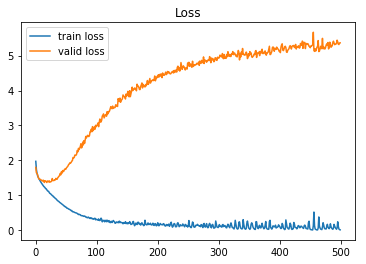

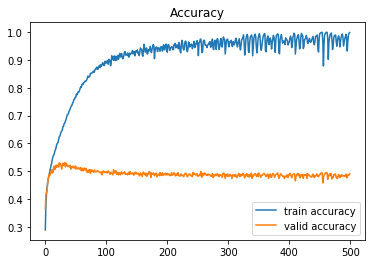

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## model with SGD optimizer

In [13]:
model = build_mlp()

optimizer = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 50us/step - loss: 2.0640 - acc: 0.2665 - val_loss: 1.9615 - val_acc: 0.2909
Epoch 2/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.8878 - acc: 0.3310 - val_loss: 1.8808 - val_acc: 0.3294
Epoch 3/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.8227 - acc: 0.3556 - val_loss: 1.8305 - val_acc: 0.3457
Epoch 4/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.7810 - acc: 0.3718 - val_loss: 1.7746 - val_acc: 0.3726
Epoch 5/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.7452 - acc: 0.3849 - val_loss: 1.8724 - val_acc: 0.3489
Epoch 6/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.7136 - acc: 0.3976 - val_loss: 1.6964 - val_acc: 0.3960
Epoch 7/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.6797 - acc: 0.4117 - val_loss: 1.7520 - 

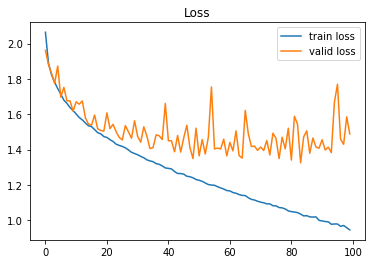

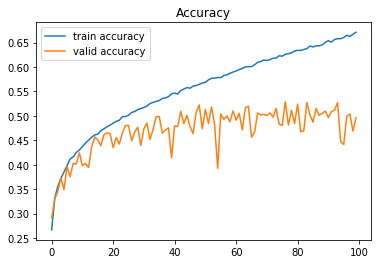

In [14]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()